In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\german_credit_data.csv")

In [36]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [37]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [38]:
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [39]:
data["Checking account"].fillna(data["Checking account"].mode()[0],inplace=True)
data["Saving accounts"].fillna(data["Saving accounts"].mode()[0],inplace=True)

In [40]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

<AxesSubplot:>

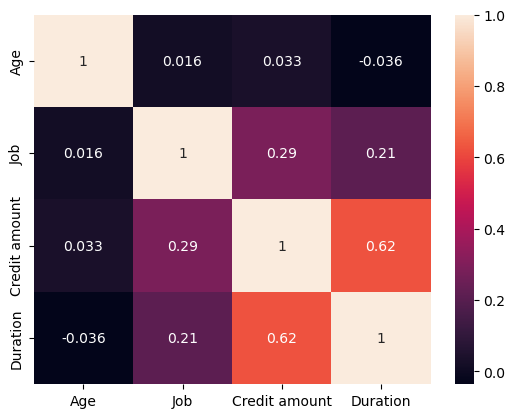

In [41]:
sns.heatmap(data.corr(), annot=True)

In [42]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


<AxesSubplot:>

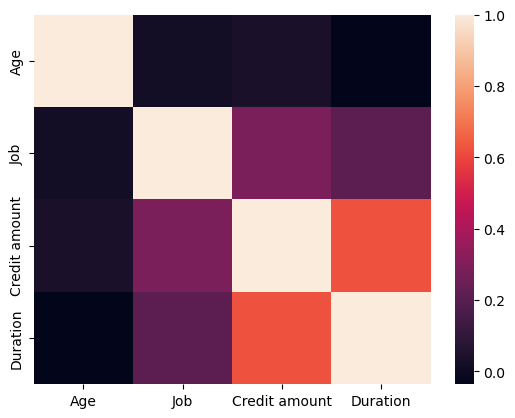

In [15]:
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

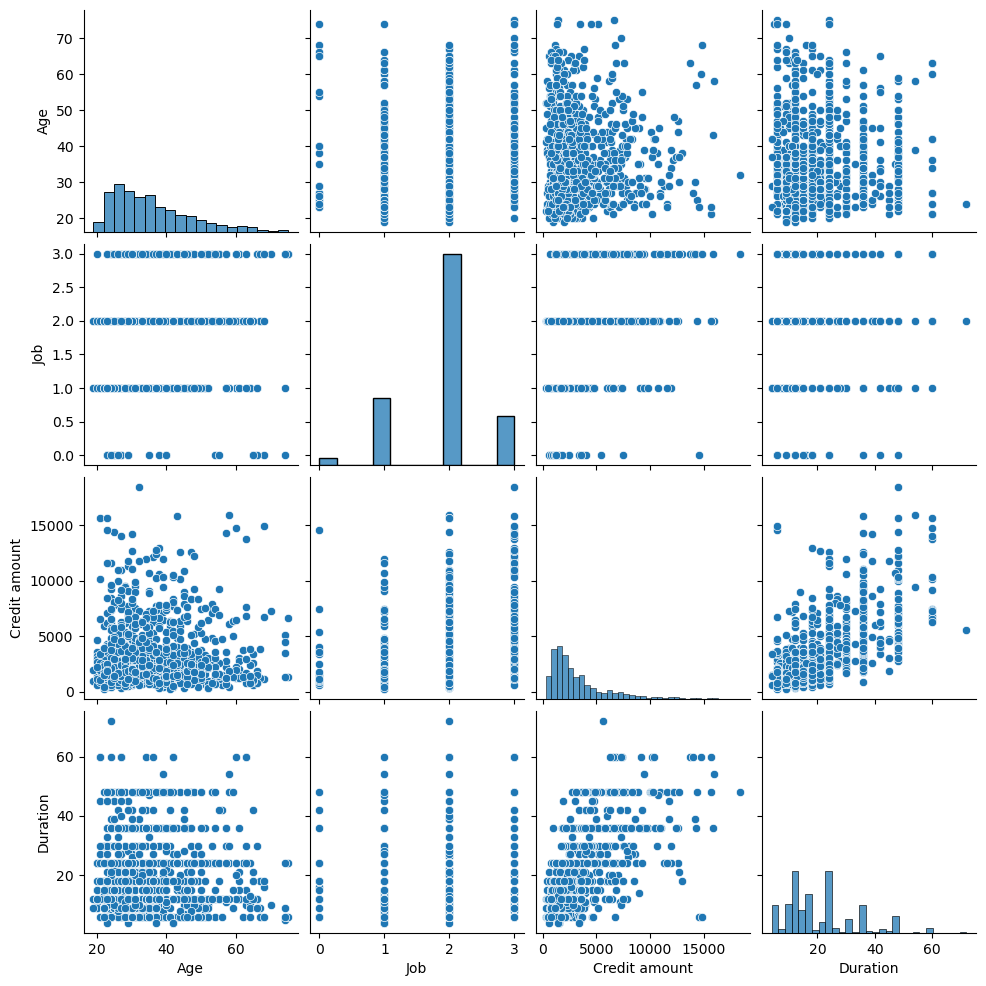

In [43]:
sns.pairplot(data=data, markers=["^","v"],palette="inferno")

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

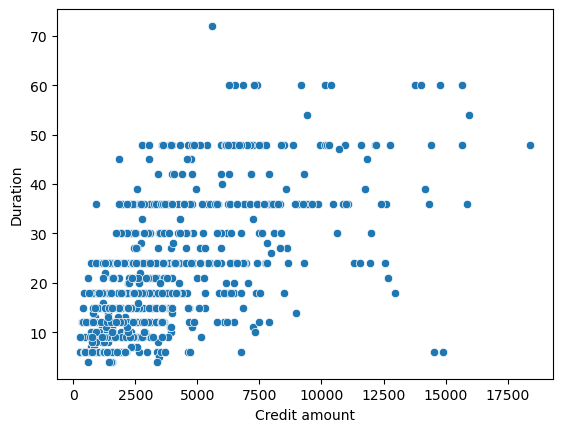

In [17]:
sns.scatterplot(x="Credit amount",y="Duration",data=data)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])
data["Housing"]=le.fit_transform(data["Housing"])
data["Checking account"]=le.fit_transform(data["Checking account"])
data["Purpose"]=le.fit_transform(data["Purpose"])
data["Risk"]=le.fit_transform(data["Risk"])
data["Saving accounts"]=le.fit_transform(data["Saving accounts"])


In [47]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


In [50]:
x= data.iloc[:,0:8].values
y= data.iloc[:,8:9].values

In [51]:
x

array([[  67,    1,    2, ...,    0, 1169,    6],
       [  22,    0,    2, ...,    1, 5951,   48],
       [  49,    1,    1, ...,    0, 2096,   12],
       ...,
       [  38,    1,    2, ...,    0,  804,   12],
       [  23,    1,    2, ...,    0, 1845,   45],
       [  27,    1,    2, ...,    1, 4576,   45]], dtype=int64)

In [52]:
y

array([[5],
       [5],
       [3],
       [4],
       [1],
       [3],
       [4],
       [1],
       [5],
       [1],
       [1],
       [0],
       [5],
       [1],
       [1],
       [5],
       [5],
       [0],
       [1],
       [5],
       [1],
       [5],
       [1],
       [1],
       [4],
       [4],
       [5],
       [5],
       [5],
       [0],
       [0],
       [4],
       [1],
       [0],
       [4],
       [5],
       [3],
       [5],
       [2],
       [5],
       [5],
       [5],
       [6],
       [1],
       [1],
       [1],
       [5],
       [1],
       [1],
       [5],
       [4],
       [1],
       [5],
       [1],
       [1],
       [1],
       [5],
       [5],
       [1],
       [4],
       [0],
       [5],
       [0],
       [0],
       [5],
       [6],
       [5],
       [1],
       [3],
       [5],
       [1],
       [5],
       [7],
       [0],
       [3],
       [1],
       [5],
       [5],
       [1],
       [4],
       [5],
       [5],
       [0],
    

In [54]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,2:3]).toarray()
b= one.fit_transform(x[:,3:4]).toarray()
c= one.fit_transform(x[:,4:5]).toarray()
t= one.fit_transform(x[:,7:8]).toarray()
x=np.delete(x,[2,3,4,7],axis=1)
x=np.concatenate((t,a,b,c,x),axis=1)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)